# Data-processing notebook

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Set your variables below

In [53]:
build_folder = "cmake-build-debug/source"
project_folders = [
    "nbodies-cpu",
    "nbodies-cuda",
    "nbodies-opencl"
]
folder_prefix = "data"

names = ['iterations', 'particles-per-second']

In [3]:
"""
experiments =
{
    'cuda': {
        'iterations': {
            'plot':figure,
            'dataframe':df
        },
        'particles_per_second': {...}
    }, ...
}
    """
experiments = {}

In [56]:
def fill(path, title):
    print("reading", path, title)
    df = pd.read_csv(path, header=None)
    fig, ax = plt.subplots()
    fig_title = ""
    if 'cuda' in path:
        fig_title += "CUDA"
    elif 'opencl' in path:
        fig_title += "OpenCL"
    else:
        fig_title += "CPU"
    fig_title += " " + title + " "
    if 'local' in path:
        fig_title += "using local memory"
    elif 'global' in path:
        fig_title += "using global memory"
    
    if title == 'iterations':
        ax.plot(df[0], df[1])
        ax.set_xlabel('time (s)')
        ax.set_ylabel('iterations')
        ax.set_xlim(left=0)
        ax.set_ylim(bottom=0)
    elif title == 'particles-per-second':
        ax.plot(df[0], df[1])
        ax.set_xlabel('time (s)')
        ax.set_ylabel('particles/second')
        ax.set_xlim(left=0)
        ax.set_ylim(bottom=min(df[1])*0.95)  # log scale can't handle 0, obviously
        #ax.set_yscale('log')
    
    ax.set_title(fig_title)
    
    return {'df': df}

def fill_experiment(folder, path: str):
    files = [os.path.join(data_path, name + '.csv') for name in names]
    experiments[folder] = {}
    print("folder:", folder)
    for file in files:
        if not os.path.exists(file):
            print("file:", file, "does not exist.")
            continue
        title = os.path.splitext(os.path.basename(file))[0]
        experiments[folder][title] = fill(file, title)

#### Encontrar los archivos y llamar a la función

folder: data-
reading cmake-build-debug/source\nbodies-cpu\data-\iterations.csv iterations
reading cmake-build-debug/source\nbodies-cpu\data-\particles-per-second.csv particles-per-second
folder: data-global-1d
reading cmake-build-debug/source\nbodies-cuda\data-global-1d\iterations.csv iterations
reading cmake-build-debug/source\nbodies-cuda\data-global-1d\particles-per-second.csv particles-per-second
folder: data-local-1d
reading cmake-build-debug/source\nbodies-opencl\data-local-1d\iterations.csv iterations
reading cmake-build-debug/source\nbodies-opencl\data-local-1d\particles-per-second.csv particles-per-second


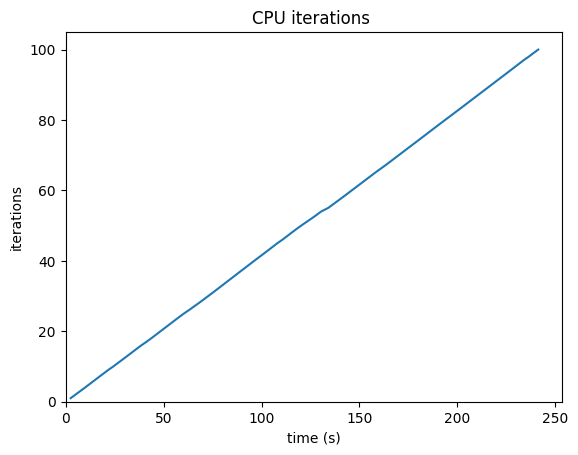

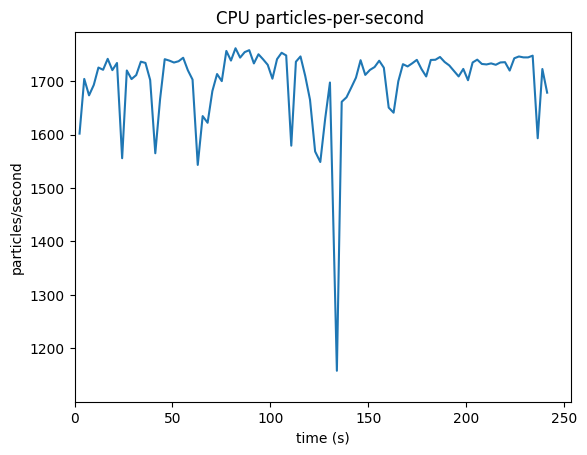

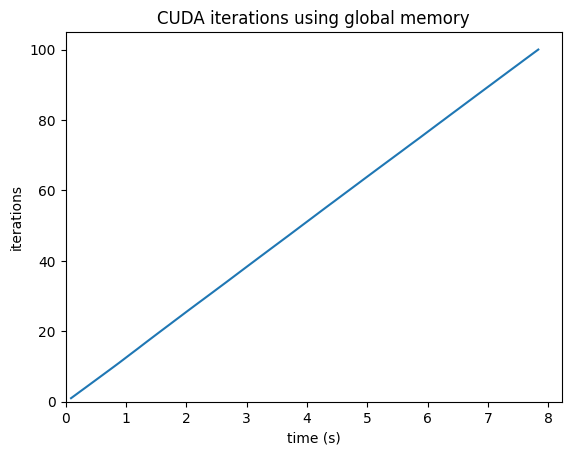

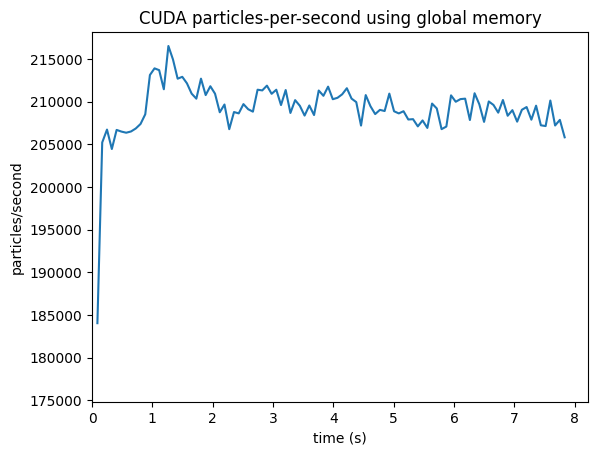

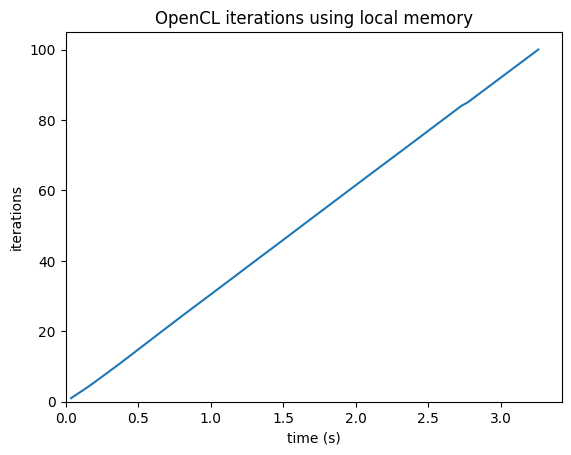

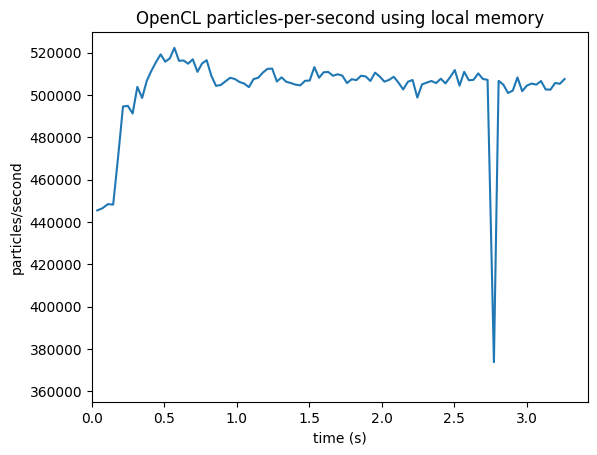

In [59]:
for p_folder in project_folders:
    project = os.path.join(build_folder, p_folder)
    for data_folder in os.listdir(project):
        data_path = os.path.join(project, data_folder)
        if os.path.isdir(data_path) and data_folder.startswith(folder_prefix):
            fill_experiment(data_folder, data_path)

In [6]:
experiments

{'data-global-1d': {'iterations': {'df':     0.0875089    1
   0    0.166951    2
   1    0.246710    3
   2    0.325939    4
   3    0.405376    5
   4    0.484631    6
   ..        ...  ...
   94   7.513850   96
   95   7.592520   97
   96   7.671210   98
   97   7.749250   99
   98   7.828630  100
   
   [99 rows x 2 columns]},
  'particles-per-second': {'df':     0.0875089  187227
   0    0.166951  206240
   1    0.246710  205417
   2    0.325939  206793
   3    0.405376  206251
   4    0.484631  206725
   ..        ...     ...
   94   7.513850  207287
   95   7.592520  208262
   96   7.671210  208196
   97   7.749250  209946
   98   7.828630  206393
   
   [99 rows x 2 columns]}}}

In [16]:
experiments['data-global-1d']['iterations']['df'][1]

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: 1, Length: 100, dtype: int64